# Uebung 1

# 1) Explorative Analyse und Vorverarbeitung

Boston Housing ist ein berühmter Datensatz zur Evaluierung von Regressionsalgorithmen. Er
enthält 506 Einträge mit jeweils 13 Variablen. Ziel ist es, den Hauspreis (‘tgt’) aus den anderen
Variablen vorherzusagen.

Importiere benötigte Module:

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mp

Herunterladen des Datensatzes:

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)
date_downloaded = !date
date_downloaded

['Mo 7. Nov 10:16:36 CET 2016']

## 1a) Explorative Analyse

Darstellung des Datensatzes als Datensatzes des Pandas-Dataframe:

In [6]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


Zeige nur die ersten 5 Einträge des Datensatzes:

In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Anzahl der Reihen und der Spalten:

In [8]:
np.shape(boston)

(506, 14)

Anzeige der Spaltennamen:

In [9]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'TGT'],
      dtype='object')

Datentyp der Spalten:

In [10]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
TGT        float64
dtype: object

Entfernung aller NaN Datensätze:

In [11]:
boston.dropna()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
np.shape(boston)

(506, 14)

In [13]:
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
TGT        False
dtype: bool

Duplikate entfernen:

In [14]:
boston.duplicated().any()

False

In [15]:
boston.drop_duplicates()
boston.duplicated().any()

False

## 1b) Analyse der Streumatrix

Zeige Erwartungswerte, Anzahl, Durchschnitt und Perzentile:

In [19]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Scattermatrix des Datensatzes:

Populating the interactive namespace from numpy and matplotlib


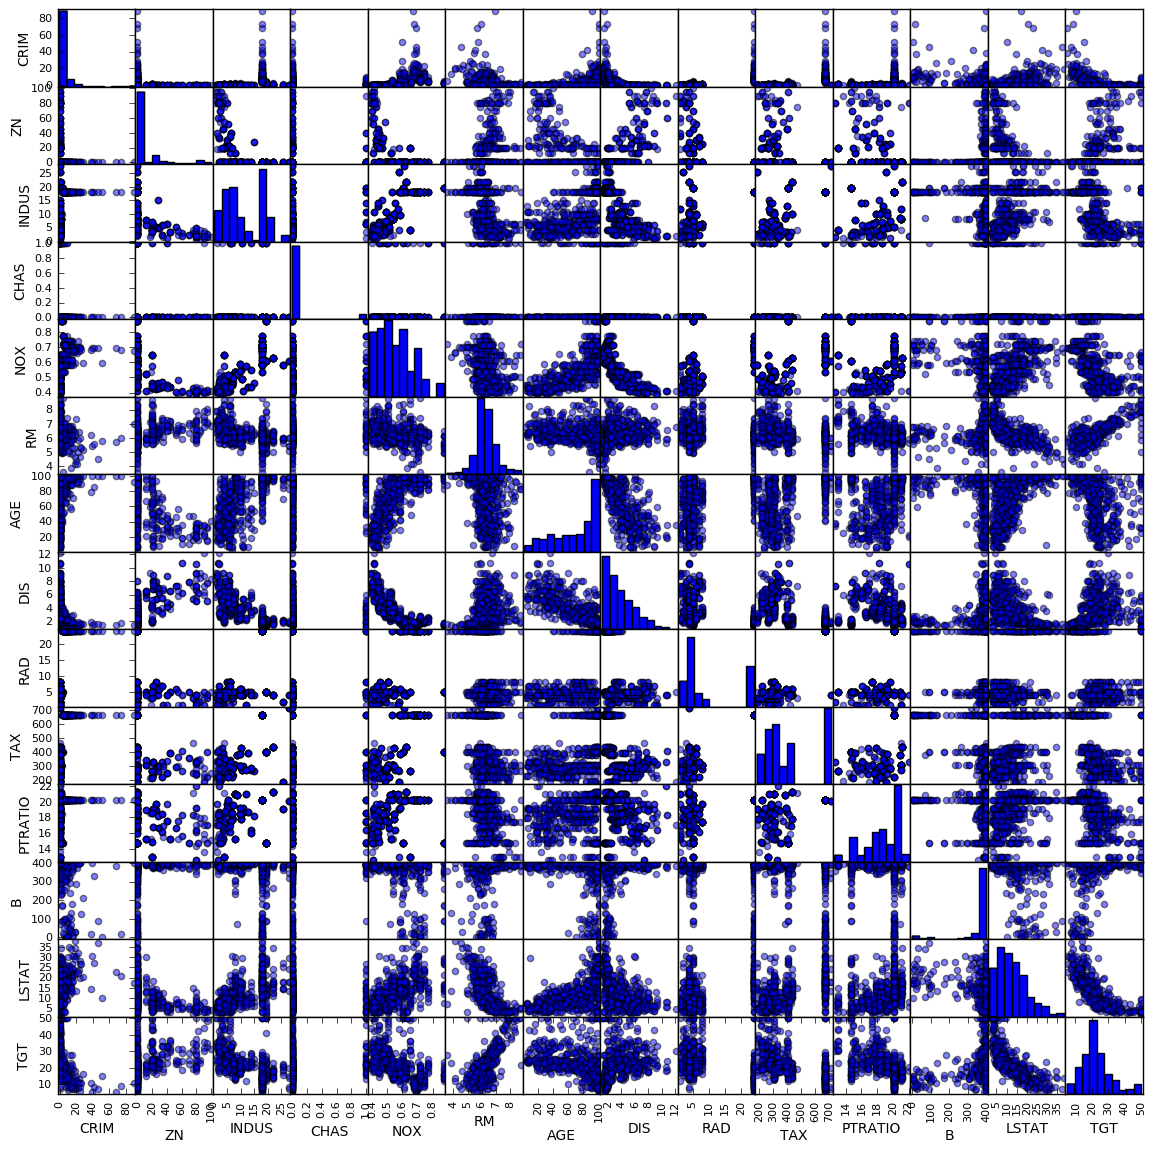

In [17]:
%pylab inline
pd.scatter_matrix(boston, figsize=(14,14), marker='o');

### Welche der Variablen sind kategorisch? 

CHAS ist kategorisch, da immer 0 oder 1

### Welche der Variablen eignen sich gut zur Vorhersage des Hauspreises (TGT) und warum? 

LSTAT (negative Korrelation), RM eignen sich, da sie mit dem Hauspreis korrelieren.

### Welche dieser Variablen sind miteinander korreliert? 

TGT - LSTAT, RM

DIS - NOX

LSTAT - RM

### Welche sind daher Kandidaten, die man evtl. weglassen könnte?

LSTAT, RM, NOX oder DIS

### 1c) Systemkonfiguration

In [18]:
%load_ext version_information
%version_information numpy, pandas, matplotlib

Software versions
Python 3.5.2 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.2.0 27 generic x86_64 with debian jessie sid
numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
Mon Nov 07 10:17:05 2016 CET